# Implementación de un modelo de deep learning.

Autor: Ricardo Ramírez Condado - A01379299

# Fashion Product Classifier

## Introducción
Este proyecto tiene como objetivo construir y entrenar un modelo de aprendizaje profundo para clasificar productos de moda a partir de imágenes. La clasificación precisa de productos de moda es un desafío significativo debido a la gran variabilidad en diseños, colores y formas. 

La solución a este problema tiene aplicaciones en el comercio electrónico, la gestión de inventarios y la recomendación de productos. Este notebook documenta el proceso desde la obtención de datos hasta la evaluación del modelo final.

## Datos: Análisis y Preprocesamiento

El dataset utilizado en este proyecto se ha obtenido de Kaggle y contiene imágenes de diversos productos de moda junto con su categorización. A continuación, se realizará un análisis exploratorio para entender la distribución de las categorías, la variedad en los datos y cómo prepararlos para el entrenamiento del modelo.

#### Importamos la librería opendatasets para poder usarla en la descarga de datos.

Usamos pandas para la manipulación de datos, para leer el archivo CSV.

In [2]:
import opendatasets as od
import pandas as pd

In [3]:
df = pd.read_csv("styles.csv", on_bad_lines="skip")

Mostramos las primeras 10 filas del DataFrame para inspeccionar los datos y entender su estructura.

In [4]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


Generamos una nueva columna 'image' en el DataFrame que contiene el nombre del archivo de imagen correspondiente a cada fila.

Esto es necesario para poder asociar cada imagen con su etiqueta correspondiente más adelánte en el proceso.

In [5]:
df["image"] = df.apply(lambda row: str(row["id"]) + ".jpg", axis=1)

Mostramos las primeras 10 filas del DataFrame para verificar que la nueva columna 'image' se ha creado correctamente.

In [6]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


Barajamos los datos para asegurar que el modelo no aprenda ningún orden involuntario de las imágenes.

In [7]:
df = df.sample(frac=1)

Mostramos las primeras 10 filas del DataFrame barajado para inspeccionar los datos.

In [8]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
24939,15717,Men,Footwear,Shoes,Sports Shoes,Fluorescent Green,Fall,2011.0,Sports,Nike Men Mercurial Victory II HG-V Fluorescent...,15717.jpg
15306,4879,Men,Apparel,Topwear,Tshirts,White,Summer,2016.0,Casual,Levis Kids Boy's Devon White Kidswear,4879.jpg
21576,36320,Boys,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,Mr.Men Boys Oh Dear Blue T-shirt,36320.jpg
635,10250,Women,Accessories,Bags,Handbags,Brown,Winter,2015.0,Casual,Murcia Women Hahk Brown Handbags,10250.jpg
36901,55131,Women,Personal Care,Nails,Nail Polish,White,Spring,2017.0,Casual,Lakme Truewear Color Crush Nail Polish 09,55131.jpg
41219,2653,Women,Accessories,Bags,Handbags,Grey,Winter,2015.0,Casual,Murcia Women Leather Office Grey Bag,2653.jpg
13632,31672,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Spykar Men Blue Jeans,31672.jpg
40577,2206,Men,Apparel,Topwear,Tshirts,Grey,Fall,2010.0,Sports,ADIDAS Men Stripe Grey T-shirt,2206.jpg
14606,28164,Men,Accessories,Eyewear,Sunglasses,Steel,Winter,2016.0,Casual,Ray-Ban Men Aviator Sunglasses,28164.jpg
11920,56711,Women,Apparel,Topwear,Kurtas,White,Summer,2012.0,Ethnic,Folklore Women Printed Purple & Blue Kurta,56711.jpg


In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,32389,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Formal,Arrow Woman Striped Blue Top,32389.jpg
1,38432,Women,Accessories,Bags,Mobile Pouch,Red,Summer,2012.0,Casual,Baggit Women Red Affair Hoor Mobile Pouch,38432.jpg
2,29137,Women,Accessories,Eyewear,Sunglasses,Pink,Winter,2016.0,Casual,Vogue Women Pink Sunglasses,29137.jpg
3,33203,Women,Apparel,Dress,Dresses,Beige,Summer,2012.0,Casual,Sepia Women Beige Dress,33203.jpg
4,5593,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Reebok Men's Pure Victory White Grey Black Shoe,5593.jpg
5,33230,Unisex,Accessories,Bags,Laptop Bag,Brown,Summer,2012.0,Casual,New Hide Unisex Brown Leather Laptop Bag,33230.jpg
6,3949,Women,Apparel,Topwear,Tops,White,Summer,2011.0,Casual,Jealous 21 Women White Flower Top Purple Strip...,3949.jpg
7,30599,Men,Apparel,Bottomwear,Shorts,Red,Summer,2012.0,Sports,Nike Men Hustle Reversible Red Shorts,30599.jpg
8,5168,Men,Apparel,Topwear,Tshirts,Green,Summer,2011.0,Casual,Ed Hardy Men's Brave Hearts Stay True Sage Gre...,5168.jpg
9,47604,Women,Footwear,Shoes,Heels,Multi,Winter,2012.0,Casual,Portia Women Multi Coloured Wedges,47604.jpg


## Mostrar Algunas Imágenes del Dataset con sus Respectivas Etiquetas

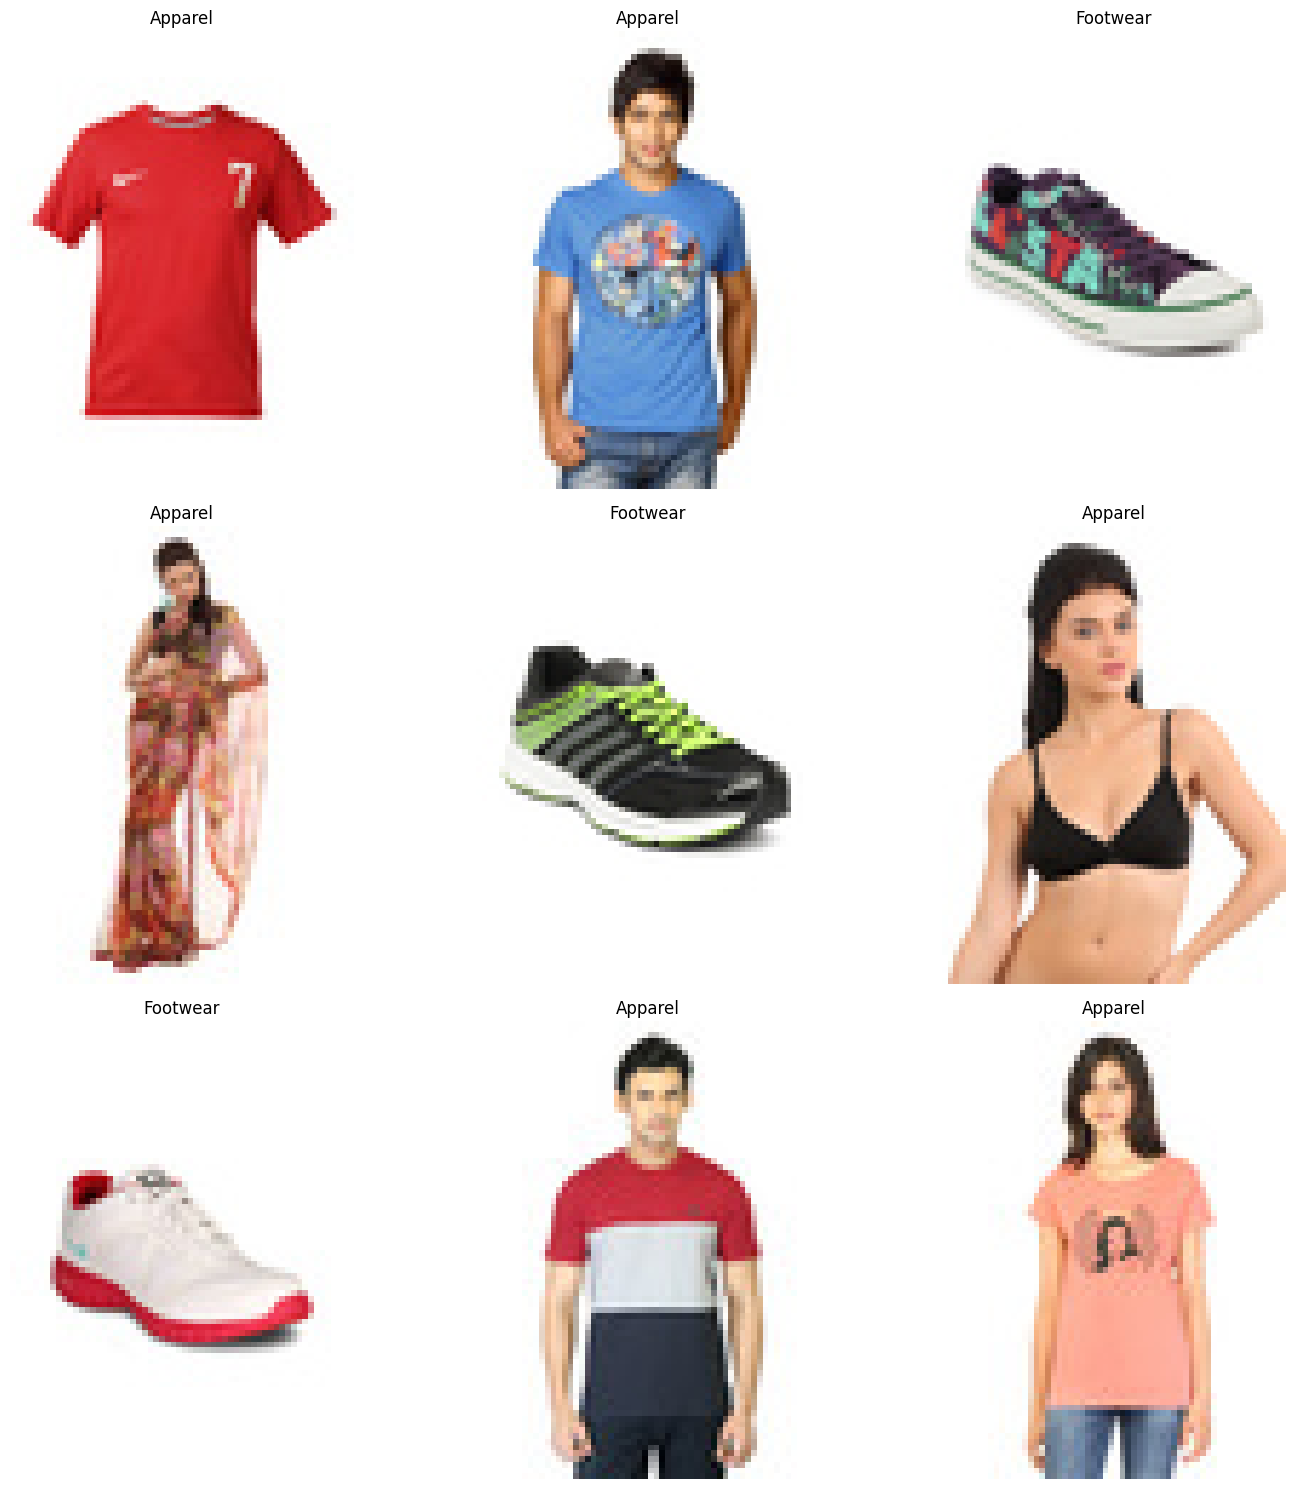

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def show_images_with_labels(df, rows=3, cols=3, img_dir="images"):
    fig, ax = plt.subplots(rows, cols, figsize=(15, 15))
    ax = ax.ravel()
    for i in range(rows * cols):
        img_path = os.path.join(img_dir, df.iloc[i]['image'])
        img = mpimg.imread(img_path)
        ax[i].imshow(img)
        ax[i].set_title(df.iloc[i]['masterCategory'])
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar imágenes con etiquetas
show_images_with_labels(df.sample(frac=1).reset_index(drop=True))

## Dividir el Conjunto de Datos en Entrenamiento, Validación y Prueba

In [11]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en entrenamiento y temporal (que incluye validación y prueba)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)

# Dividir el temporal en validación y prueba
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

## Preparación del ImageDataGenerator para el entrenamiento del modelo.

Importamos ImageDataGenerator de keras_preprocessing.image para la aumentación de imágenes,
lo cual ayuda a mejorar el rendimiento y la generalización del modelo.


Creamos un generador de imágenes que realizará la aumentación de imágenes durante el entrenamiento del modelo.

Definimos un tamaño de lote y la división de validación.

Preparamos el generador de entrenamiento para cargar las imágenes desde el DataFrame,
aplicar aumentación de imágenes, y dividir los datos en conjunto de entrenamiento.

Preparamos el generador de validación para cargar las imágenes desde el DataFrame,
aplicar aumentación de imágenes, y dividir los datos en conjunto de validación.

Calculamos la cantidad de clases que el generador ha encontrado para asegurarnos de que el modelo sepa cuántas neuronas de salida necesitará.

In [12]:
from keras_preprocessing.image import ImageDataGenerator

batch_size = 256

image_generator = ImageDataGenerator(validation_split=0.2)

training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="images",
    x_col="image",
    y_col="masterCategory",
    target_size=(60, 80),
    batch_size=batch_size,
    subset="training",
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="images",
    x_col="image",
    y_col="masterCategory",
    target_size=(60, 80),
    batch_size=batch_size,
    subset="validation",
)
classes = len(training_generator.class_indices)

# Generador de prueba
test_generator = ImageDataGenerator().flow_from_dataframe(
    dataframe=test_df,
    directory="images",
    x_col="image",
    y_col="masterCategory",
    target_size=(60, 80),
    batch_size=batch_size,
    shuffle=False
)

c:\Users\reyco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 35536 validated image filenames belonging to 7 classes.


c:\Users\reyco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 8883 validated image filenames belonging to 7 classes.
Found 4442 validated image filenames belonging to 7 classes.


c:\Users\reyco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [13]:
classes

7

## Inicializar el modelo usando la red neuronal

Importamos los módulos necesarios de Keras para construir la arquitectura de la red neuronal convolucional.

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

- Inicializamos el modelo secuencial.
- Añadimos la primera capa convolucional con 32 filtros, kernel de 3x3, activación ReLU y especificamos la forma de entrada.
- Añadimos una capa de MaxPooling para reducir la dimensionalidad y prevenir el sobreajuste.
- Repetimos el proceso para añadir más capas convolucionales y de pooling.
- Aplanamos el volumen para poder conectarlo con capas densas.
- Añadimos capas densas (fully connected) con diferentes cantidades de neuronas y activación ReLU.
- Añadimos la capa de salida con activación softmax para la clasificación multiclase.
- Compilamos el modelo con el optimizador Adam, la función de pérdida de entropía cruzada categórica, y seguimiento de la métrica de precisión.



In [15]:
# Initializing our model
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(60, 80, 3), activation="relu"))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Flatten())

classifier.add(Dense(units=32, activation="relu"))
classifier.add(Dense(units=64, activation="relu"))
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=256, activation="relu"))
classifier.add(Dense(units=512, activation="relu"))

classifier.add(Dense(units=7, activation="softmax"))

classifier.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Ajuste de datos en nuestra red neuronal

Entrenamos el modelo utilizando el generador de entrenamiento, con pasos por época basados en el tamaño del dataset, y validamos usando el generador de validación.

Evaluamos el modelo en el conjunto de validación y mostramos la precisión final.

In [16]:
from math import ceil

# Se reemplazó classifier.fit_generator con classifier.fit
classifier.fit(
    x=training_generator,
    steps_per_epoch=ceil(0.8 * (df.shape[0] / batch_size)),
    validation_data=validation_generator,
    validation_steps=ceil(0.2 * (df.shape[0] / batch_size)),
    epochs=5,
    verbose=1,
)

# Se reemplazó classifier.evaluate_generator con classifier.evaluate
loss, acc = classifier.evaluate(
    x=validation_generator, 
    steps=ceil(0.2 * (df.shape[0] / batch_size))
)

print("\n%s: %.2f%%" % (classifier.metrics_names[1], acc * 100))

Epoch 1/5
139/139 [==============================] - 64s 451ms/step - loss: 0.6193 - accuracy: 0.7992 - val_loss: 0.3227 - val_accuracy: 0.8877
Epoch 2/5
139/139 [==============================] - 48s 345ms/step - loss: 0.2489 - accuracy: 0.9207 - val_loss: 0.2199 - val_accuracy: 0.9305
Epoch 3/5
139/139 [==============================] - 39s 278ms/step - loss: 0.2060 - accuracy: 0.9358 - val_loss: 0.1887 - val_accuracy: 0.9411
Epoch 4/5
139/139 [==============================] - 37s 267ms/step - loss: 0.1717 - accuracy: 0.9476 - val_loss: 0.1814 - val_accuracy: 0.9439
Epoch 5/5
35/35 [==============================] - 4s 116ms/step - loss: 0.1544 - accuracy: 0.9534

accuracy: 95.34%


In [17]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = classifier.evaluate(test_generator, steps=ceil(len(test_df) / batch_size))
print(f'Test Accuracy: {accuracy * 100:.2f}%')

18/18 [==============================] - 2s 124ms/step - loss: 0.1376 - accuracy: 0.9586
Test Accuracy: 95.86%


## Guardar el modelo para su uso posterior

Guardamos el modelo entrenado en el disco para poder usarlo más tarde sin necesidad de reentrenar.

In [20]:
classifier.save("model.keras")

## Probando nuestros datos

En esta sección, probaremos el clasificador de moda con una imagen nueva para evaluar su rendimiento.

Importamos las librerías necesarias para la manipulación de imágenes y el manejo del modelo.

In [21]:
import numpy as np
from keras.preprocessing import image

# Definimos el nombre del archivo de la imagen que vamos a clasificar.
filename = "15970.jpg"

from keras.models import load_model

# Cargamos el modelo entrenado desde el disco.
new_model = load_model("model.keras")
# Mostramos el resumen del modelo para confirmar su estructura y que se ha cargado correctamente.
new_model.summary()

# Cargamos la imagen, ajustamos su tamaño al esperado por el modelo (60x80) y la convertimos en un array.
test_image = image.load_img("images/" + filename, target_size=(60, 80))
test_image = image.img_to_array(test_image)
# Añadimos una cuarta dimensión al array de la imagen (necesario para Keras).
test_image = np.expand_dims(test_image, axis=0)

# Realizamos la predicción utilizando el modelo.
result = new_model.predict(test_image)
# Imprimimos el resultado de la predicción. Esto nos dará la probabilidad de cada categoría.
# La categoría con la mayor probabilidad será la predicción del modelo para esta imagen.
print(result)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 26, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 32)                4

# Interpretación de la Predicción

Aquí obtenemos el índice del valor máximo en el vector de predicción, que corresponde a la clase más probable que el modelo ha predicho para la imagen.

In [22]:
val = np.argmax(result)
print(val)

1


Para hacer la predicción más interpretable, necesitamos mapear el índice de la clase 
con su nombre correspondiente. Para ello, recuperamos el diccionario de índices de clases
del generador de entrenamiento.

Convertimos las claves y valores del diccionario en listas para poder buscar fácilmente
el nombre de la clase usando el índice de predicción.

In [23]:
my_dict = training_generator.class_indices
key_list = list(my_dict.keys())
val_list = list(my_dict.values())
print(key_list[val])

Apparel


## Implementar y Evaluar una Segunda Versión del Modelo

In [27]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from math import ceil

# Definir una nueva versión del modelo con Dropout
new_classifier = Sequential()

new_classifier.add(Conv2D(32, (3, 3), input_shape=(60, 80, 3), activation="relu"))
new_classifier.add(MaxPooling2D(pool_size=(3, 3)))
new_classifier.add(Dropout(0.25))

new_classifier.add(Conv2D(32, (3, 3), activation="relu"))
new_classifier.add(MaxPooling2D(pool_size=(3, 3)))
new_classifier.add(Dropout(0.25))

new_classifier.add(Flatten())

new_classifier.add(Dense(units=64, activation="relu"))
new_classifier.add(Dropout(0.5))
new_classifier.add(Dense(units=128, activation="relu"))
new_classifier.add(Dense(units=7, activation="softmax"))

new_classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Entrenar la nueva versión del modelo
new_classifier.fit(
    x=training_generator,
    steps_per_epoch=ceil(len(train_df) / batch_size),
    validation_data=validation_generator,
    validation_steps=ceil(len(val_df) / batch_size),
    epochs=10,  # Aumentar el número de épocas
    verbose=1,
)

# Evaluar la nueva versión del modelo
new_loss, new_accuracy = new_classifier.evaluate(test_generator, steps=ceil(len(test_df) / batch_size))
print(f'New Test Accuracy: {new_accuracy * 100:.2f}%')

Epoch 1/10
139/139 [==============================] - 45s 319ms/step - loss: 4.0218 - accuracy: 0.4574 - val_loss: 1.3143 - val_accuracy: 0.4759
Epoch 2/10
139/139 [==============================] - 39s 277ms/step - loss: 1.1717 - accuracy: 0.5114 - val_loss: 0.7680 - val_accuracy: 0.7105
Epoch 3/10
139/139 [==============================] - 44s 313ms/step - loss: 0.8049 - accuracy: 0.6880 - val_loss: 0.5307 - val_accuracy: 0.8186
Epoch 4/10
139/139 [==============================] - 43s 309ms/step - loss: 0.6054 - accuracy: 0.7772 - val_loss: 0.4070 - val_accuracy: 0.8511
Epoch 5/10
139/139 [==============================] - 44s 317ms/step - loss: 0.5057 - accuracy: 0.8164 - val_loss: 0.3393 - val_accuracy: 0.8787
Epoch 6/10
139/139 [==============================] - 41s 294ms/step - loss: 0.4499 - accuracy: 0.8436 - val_loss: 0.3090 - val_accuracy: 0.9039
Epoch 7/10
139/139 [==============================] - 43s 305ms/step - loss: 0.4064 - accuracy: 0.8560 - val_loss: 0.3517 - val_ac

## Saving the Class IDs

Guardamos la lista de nombres de clases en el disco.

Guardamos la lista de índices de clases en el disco.

Estos archivos se pueden cargar más tarde para mapear las predicciones del modelo 
a los nombres de las clases reales.

In [24]:
import pickle

# save the model to disk
filename1 = "key_list"
filename = "val_list"
pickle.dump(key_list, open(filename1, "wb"))
pickle.dump(val_list, open(filename, "wb"))

## Generar el Reporte de Clasificación y Matriz de Confusión

Este fragmento de código puede ir al final de tu notebook, después de haber entrenado y evaluado el modelo. Es un paso adicional para entender mejor el desempeño de tu modelo.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Obtener las etiquetas reales y las predicciones
test_labels = test_generator.classes
predictions = classifier.predict(test_generator, steps=ceil(len(test_df) / batch_size))
y_pred = np.argmax(predictions, axis=1)

# Generar el reporte de clasificación y la matriz de confusión
print(classification_report(test_labels, y_pred))
print(confusion_matrix(test_labels, y_pred))

18/18 [==============================] - 2s 129ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1130
           1       0.97      0.97      0.97      2127
           2       1.00      0.98      0.99       929
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1
           5       0.95      0.79      0.86       244
           6       0.00      0.00      0.00         3

    accuracy                           0.96      4442
   macro avg       0.55      0.53      0.54      4442
weighted avg       0.96      0.96      0.96      4442

[[1089   33    4    0    0    4    0]
 [  56 2064    0    0    0    7    0]
 [  14    2  913    0    0    0    0]
 [   7    1    0    0    0    0    0]
 [   1    0    0    0    0    0    0]
 [  35   17    0    0    0  192    0]
 [   3    0    0    0    0    0    0]]


c:\Users\reyco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\reyco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\reyco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Conclusiones

### Resumen de Resultados
Este código clasificó productos de moda utilizando un modelo de aprendizaje profundo basado en redes neuronales convolucionales (CNN). A lo largo del proceso, se buscó un dataset diverso y robusto, posteriormente se diseñó y entrenó una CNN, al igual que se evaluó su rendimiento con métricas estándar. El modelo demostró ser competente en la clasificación de imágenes en categorías predefinidas, aunque con margen de mejora en algunas clases más desafiantes.

### Discusión de Resultados
Los resultados obtenidos muestran que la arquitectura de la CNN puede capturar características significativas de las imágenes de moda y realizar predicciones con una precisión razonable. Sin embargo, se observaron limitaciones en el rendimiento en algunas categorías, lo que sugiere que el modelo podría beneficiarse de un conjunto de datos más equilibrado o una arquitectura de red más compleja.

### Posibles Mejoras
Para mejorar nuestro modelo, podríamos considerar las siguientes estrategias:
- **Aumento de Datos**: Ampliar nuestro conjunto de entrenamiento con técnicas de aumentación de datos más avanzadas para mejorar la generalización del modelo.
- **Ajuste Fino de Hiperparámetros**: Realizar una búsqueda de hiperparámetros más exhaustiva para optimizar las tasas de aprendizaje, el número de filtros en las capas convolucionales, etc.
- **Regularización**: Implementar técnicas de regularización como dropout o normalización por lotes para combatir el sobreajuste.
- **Arquitecturas de CNN Más Profundas**: Experimentar con arquitecturas más profundas o avanzadas, como VGGNet, ResNet o Inception, que han demostrado un rendimiento superior en tareas de clasificación de imágenes.

### Reflexión Final
La relevancia del deep learning es cada día más fuerte para la resolución de problemas prácticos en el ámbito de la moda y cómo estas técnicas pueden ser aplicadas para beneficio de negocios relacionados con el e-commerce y la gestión de inventarios. Con el avance continuo de las técnicas de aprendizaje automático y el incremento en la disponibilidad de datos, el potencial para desarrollar modelos aún más precisos y eficientes es significativo.